In [ ]:
# regress the Hill estimator of abs returns on log V_f
def plot_regression(range, data, title, x_label, y_label, variance: bool):
    X = np.array(range).reshape(-1,1)
    if variance:
        y = data
    else:
        y = data.loc['mean'].values
    reg = LinearRegression().fit(X, y)
    plt.scatter(X, y)
    plt.plot(X, reg.predict(X), color='red')
    plt.title(F"{title}")
    plt.xlabel(f"{x_label}")
    plt.ylabel(f'{y_label}')
    plt.show()
    print(f'R^2: {str(reg.score(X, y))})')
    print(f'intercept: {str(reg.intercept_)}')
    print(f'coefficient: {str(reg.coef_)}')

# getting p value from LinearRegression library, using the implementation by Rakesh Racharla found on:
# https://www.cluzters.ai/forums/topic/395/find-p-value-significance-in-scikit-learn-linear-regression?c=1597

    parameters = np.append(reg.intercept_,reg.coef_)
    predictions = reg.predict(X)

    NewX = np.append(np.ones((len(X),1)), X, axis = 1)
    MSE = (sum((y-predictions)**2))/(len(NewX)-len(NewX[0]))

    var = MSE*(np.linalg.inv(np.dot(NewX.T,NewX)).diagonal())
    sd = np.sqrt(var)
    ts = parameters/sd

    p_value = [2*(1-stats.t.cdf(np.abs(element),(len(NewX)-len(NewX[0])))) for element in ts][1]

    # # Get the p-value of the regression coefficients
    # p_value = model.pvalues[0]

    print('Null hypothesis: the coefficient is zero')
    print('Alternative hypothesis: the coefficient is not zero')
    print('If p value is less than 0.05, we reject the null hypothesis')
    print(f'p value: {str(p_value)}')
    if p_value < 0.05:
        print('Thus, we reject the null hypothesis in favor of the alternative hypothesis')
        print(f'However, the sample size is {len(X)} so the results are not very reliable')
    else:
        print('Thus, we fail to reject the null hypothesis')

In [ ]:
def r_squared(data, alpha, beta, x_range):
    """
    Goodness of fit test for regression
    """
    ss_res = []
    ss_total = []
    mean = np.mean(data)

    for i in range(len(x_range)):
        prediction = alpha + beta * x_range[i]
        value = data[i]

        residual = (value - prediction) ** 2
        total = (value - mean) ** 2

        ss_res.append(residual)
        ss_total.append(total)

    return 1 - (sum(ss_res) / sum(ss_total))


In [ ]:
def dict_to_df(dict, range) -> pd.DataFrame:
    df = pd.DataFrame(dict)
    df_transp = df.transpose()
    df_transp.columns = range
    df_transp.drop("Range")
    
    return df_transp

In [ ]:
iterations = 10

In [ ]:
# variances for return and volume for different n values
n_range = [2**i for i in range(9, 15)]
dict_return_variances_n = {'Range': n_range}
dict_volume_variances_n = {'Range': n_range}

for run in range(iterations):
    return_variances = []
    volume_variances = []

    for i in n_range:
        n = i
        n_test = Model(p, n, size, k, omega, b=1)
        for step in range(t):
            n_test.step()
        
        return_variance = np.var(n_test.daily_returns)
        volume_variance = np.var(n_test.daily_trading_volumes)
        
        return_variances.append(return_variance)
        volume_variances.append(volume_variance)
    
    dict_return_variances_n[f'Iteration {run}'] = return_variances
    dict_volume_variances_n[f'Iteration {run}'] = volume_variances

    print(run)
        

KeyboardInterrupt: 

In [ ]:
# to pandas
df_return_variances_n = dict_to_df(dict_return_variances_n, n_range)
df_volume_variances_n = dict_to_df(dict_volume_variances_n, n_range)

# save to csv
df_return_variances_n.to_csv('return_variances_n.csv')
df_volume_variances_n.to_csv('volume_variances_n.csv')

In [ ]:
# mean and sd
mean_return_variances_n = df_return_variances_n.mean()
sd_return_variances_n = df_return_variances_n.std()

mean_volume_variances_n = df_volume_variances_n.mean()
sd_volume_variances_n = df_volume_variances_n.std()

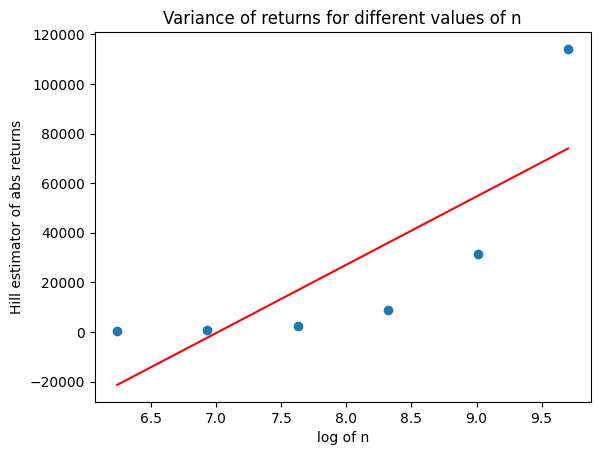

R^2: 0.6401004889072457)
intercept: -192830.4211753269
coefficient: [27493.62889704]
Null hypothesis: the coefficient is zero
Alternative hypothesis: the coefficient is not zero
If p value is less than 0.05, we reject the null hypothesis
p value: 0.05596609105818273
Thus, we fail to reject the null hypothesis


In [ ]:
# plot return regression for n
plot_regression(np.log(n_range), mean_return_variances_n, "Variance of returns for different values of n", 'log of n', 'Variance', variance=True)

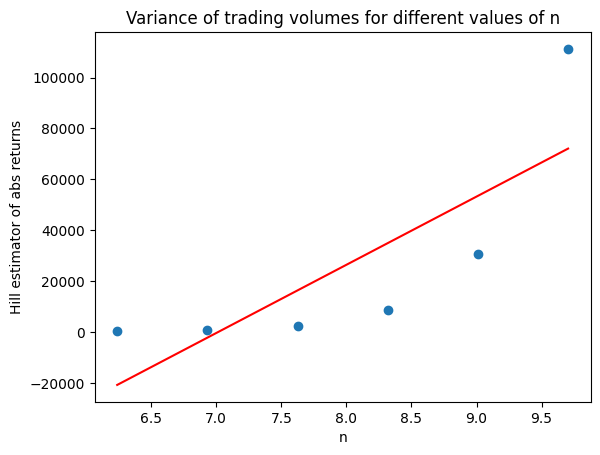

R^2: 0.6394014634467797)
intercept: -188017.05781818417
coefficient: [26803.29370911]
Null hypothesis: the coefficient is zero
Alternative hypothesis: the coefficient is not zero
If p value is less than 0.05, we reject the null hypothesis
p value: 0.05620222131870101
Thus, we fail to reject the null hypothesis


In [ ]:
# plot volume regression for n
plot_regression(np.log(n_range), mean_volume_variances_n, "Variance of trading volumes for different values of n", 'n', 'Variance', variance=True)

In [ ]:
# variances for return and volume for different k values
k_range = [i*0.5 for i in range(1, 51, 5)]

dict_return_variances_k = {'Range': k_range}
dict_volume_variances_k = {'Range': k_range}

for run in range(iterations):
    return_variances = []
    volume_variances = []


    for i in k_range:
        k = i
        k_test = Model(p, n, size, k, omega, b=1)
        for step in range(t):
            k_test.step()

        return_variance = np.var(k_test.daily_returns)
        volume_variance = np.var(k_test.daily_trading_volumes)
        volume_variances.append(volume_variance)
        return_variances.append(return_variance)

    dict_return_variances_k[f"Iteration {run}"] = return_variances
    dict_volume_variances_k[f"Iteration {run}"] = volume_variances

    print(run)

0
1
2


In [ ]:
df_return_variances_k = dict_to_df(dict_return_variances_k, k_range)
df_volume_variances_k = dict_to_df(dict_volume_variances_k, k_range)

df_return_variances_k.to_csv('data/return_variances_k.csv')
df_volume_variances_k.to_csv('data/volume_variances_k.csv')

In [ ]:
k_return_variances_mean = np.array(df_return_variances_k.mean())
k_volume_variances_mean = np.array(df_volume_variances_k.mean())
k_return_variances_sd = np.array(df_return_variances_k.std())
k_volume_variances_sd = np.array(df_volume_variances_k.std())

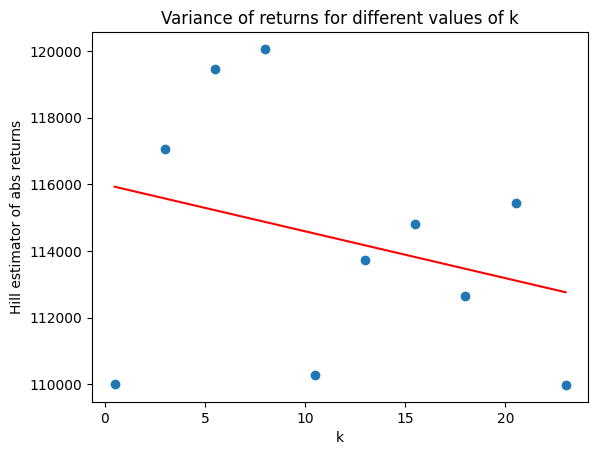

R^2: 0.0814411274739425)
intercept: 115995.91476569421
coefficient: [-140.57842688]
Null hypothesis: the coefficient is zero
Alternative hypothesis: the coefficient is not zero
If p value is less than 0.05, we reject the null hypothesis
p value: 0.4241384186962802
Thus, we fail to reject the null hypothesis


In [ ]:
# plot return regression for k
plot_regression(k_range, k_return_variances_mean, "Variance of returns for different values of k", 'k', 'Variance', variance=True)

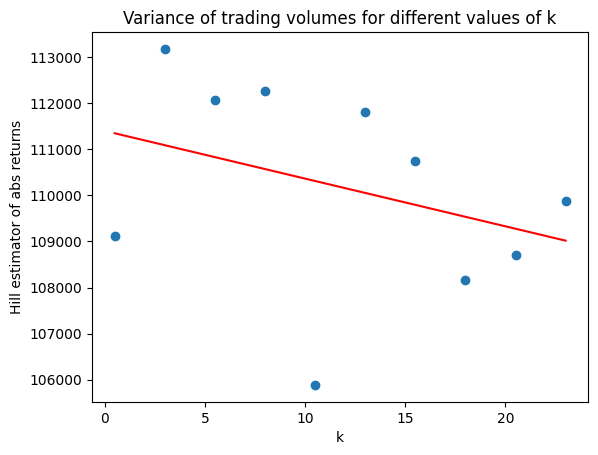

R^2: 0.12080755372619412)
intercept: 111399.49340873506
coefficient: [-103.58412713]
Null hypothesis: the coefficient is zero
Alternative hypothesis: the coefficient is not zero
If p value is less than 0.05, we reject the null hypothesis
p value: 0.32506805875207667
Thus, we fail to reject the null hypothesis


In [ ]:
# plot volume regression for k
plot_regression(k_range, k_volume_variances_mean, "Variance of trading volumes for different values of k", 'k', 'Variance', variance=True)

In [ ]:
# omega values for return and volume for different k values
omega_range = [i*0.1 for i in range(1, 21)]
omega_return_dict = {'Range': omega_range}
omega_volume_dict = {'Range': omega_range}

for run in range(iterations):
    return_variances = []
    volume_variances = []

    for i in omega_range:
        omega = i
        omega_test = Model(p, n, size, k, i, b=1)
        for step in range(t):
            omega_test.step()

        return_variance = np.var(omega_test.daily_returns)
        volume_variance = np.var(omega_test.daily_trading_volumes)
        volume_variances.append(volume_variance)
        return_variances.append(return_variance)

    omega_return_dict[f"Iteration {run}"] = return_variances
    omega_volume_dict[f"Iteration {run}"] = volume_variances

    print(run)

0
1
2


In [ ]:
df_omega_return_variances = dict_to_df(omega_return_dict, omega_range)
df_omega_volume_variances = dict_to_df(omega_volume_dict, omega_range)
df_omega_return_variances.to_csv('data/return_variances_omega.csv')
df_omega_volume_variances.to_csv('data/volume_variances_omega.csv')

In [ ]:
omega_return_means = np.array(df_omega_return_variances.mean())
omega_volume_means = np.array(df_omega_volume_variances.mean())

omega_return_sd = np.array(df_omega_return_variances.std())
omega_volume_sd = np.array(df_omega_volume_variances.std())

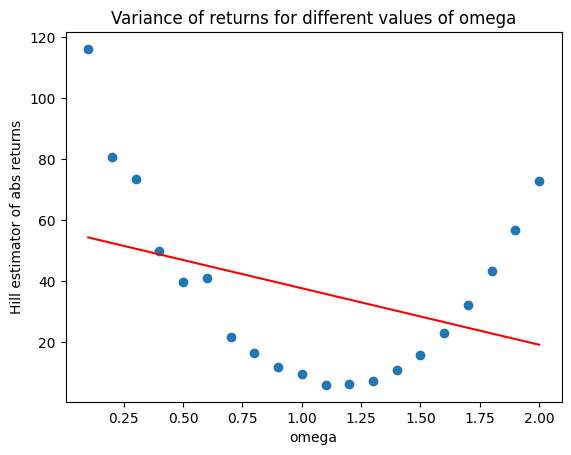

R^2: 0.12943477959271144)
intercept: 56.20370158401105
coefficient: [-18.52116937]
Null hypothesis: the coefficient is zero
Alternative hypothesis: the coefficient is not zero
If p value is less than 0.05, we reject the null hypothesis
p value: 0.1192223157976191
Thus, we fail to reject the null hypothesis


In [ ]:
# Return variance for different values of omega
plot_regression(omega_range, omega_return_means, "Variance of returns for different values of omega", 'omega', 'Variance', variance=True)

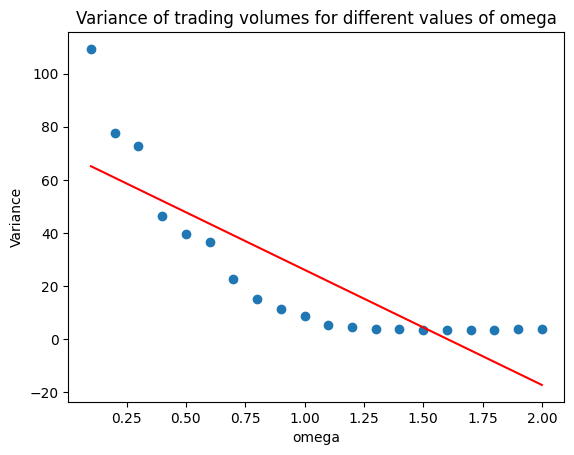

R^2: 0.6963851151981557)
intercept: 69.46142210921052
coefficient: [-43.39791748]
Null hypothesis: the coefficient is zero
Alternative hypothesis: the coefficient is not zero
If p value is less than 0.05, we reject the null hypothesis
p value: 4.77214884164745e-06
Thus, we reject the null hypothesis in favor of the alternative hypothesis
However, the sample size is 20 so the results are not very reliable


In [ ]:
# Volume variance for different values of omega
plot_regression(omega_range, omega_volume_means, "Variance of trading volumes for different values of omega", 'omega', 'Variance', variance=True)

In [ ]:
# p_test - return and volume variances
p_range = [i*0.1 for i in range(1, 6)]

dict_return_variances_p = {'Range': p_range}
dict_volume_variances_p = {'Range': p_range}

for run in range(iterations):
    returns = []
    volumes = []

    for i in p_range:
        p = i
        p_test = Model(p, n, size, k, omega, b=1)
        
        for step in range(t):
            p_test.step()

        return_variance = np.var(p_test.daily_returns)
        volume_variance = np.var(p_test.daily_trading_volumes)
        returns.append(return_variance)
        volumes.append(volume_variance)

    dict_return_variances_p[f"Iteration {run}"] = returns
    dict_volume_variances_p[f"Iteration {run}"] = volumes

print(run)


2


In [ ]:
df_return_variances_p = dict_to_df(dict_return_variances_p, p_range)
df_volume_variances_p = dict_to_df(dict_volume_variances_p, p_range)

df_return_variances_p.to_csv('data/return_variances_p.csv')
df_volume_variances_p.to_csv('data/volume_variances_p.csv')

In [ ]:
p_return_means = np.array(df_return_variances_p.mean())
p_return_sd = np.array(df_return_variances_p.std())

p_volume_means = np.array(df_volume_variances_p.mean())
p_volume_sd = np.array(df_volume_variances_p.std())


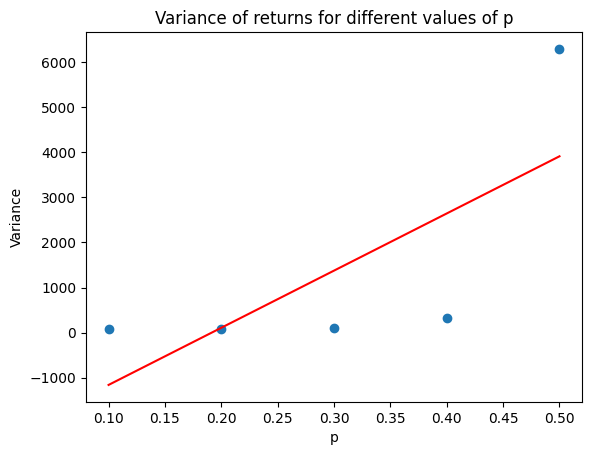

R^2: 0.5310019872563277)
intercept: -2433.15903
coefficient: [12695.3811]
Null hypothesis: the coefficient is zero
Alternative hypothesis: the coefficient is not zero
If p value is less than 0.05, we reject the null hypothesis
p value: 0.16255342695033015
Thus, we fail to reject the null hypothesis


In [ ]:
# Return variance for different values of p
plot_regression(p_range, p_return_means, "Variance of returns for different values of p", 'p', 'Variance', variance=True)

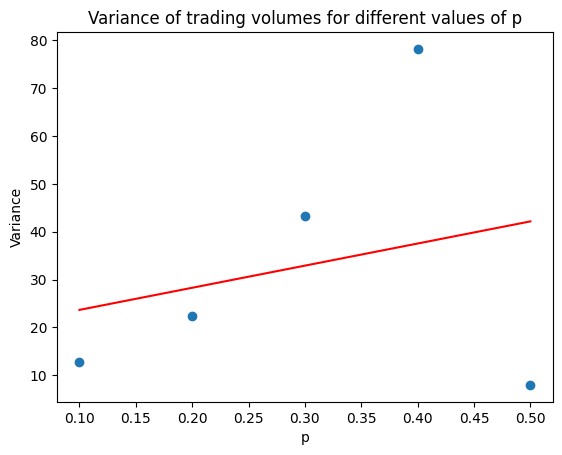

R^2: 0.06488306161906499)
intercept: 19.028344999999995
coefficient: [46.2659]
Null hypothesis: the coefficient is zero
Alternative hypothesis: the coefficient is not zero
If p value is less than 0.05, we reject the null hypothesis
p value: 0.6792205782103833
Thus, we fail to reject the null hypothesis


In [ ]:
# Volume variance for different values of p
plot_regression(p_range, p_volume_means, "Variance of trading volumes for different values of p", 'p', 'Variance', variance=True)

In [ ]:
# b_test - return and volume variances
b_range = [i*0.5 for i in range(0, 6)]

dict_return_variances_b = {'Range': b_range}
dict_volume_variances_b = {'Range': b_range}

for run in range(iterations):
    returns = []
    volumes = []

    for i in b_range:
        b = i
        b_test = Model(p, n, size, k, omega, b=1)
        
        for step in range(t):
            b_test.step()

        return_variance = np.var(b_test.daily_returns)
        volume_variance = np.var(b_test.daily_trading_volumes)
        returns.append(return_variance)
        volumes.append(volume_variance)

    dict_return_variances_b[f"Iteration {run}"] = returns
    dict_volume_variances_b[f"Iteration {run}"] = volumes

print(run)


2


In [ ]:
# Convert to dataframes
df_return_variances_b = dict_to_df(dict_return_variances_b, b_range)
df_volume_variances_b = dict_to_df(dict_volume_variances_b, b_range)

# Save to csv
df_return_variances_b.to_csv('data/return_variances_b.csv')
df_volume_variances_b.to_csv('data/volume_variances_b.csv')

In [ ]:
# Means and standard deviations
b_return_means = np.array(df_return_variances_b.mean())
b_return_sd = np.array(df_return_variances_b.std())

b_volume_means = np.array(df_volume_variances_b.mean())
b_volume_sd = np.array(df_volume_variances_b.std())

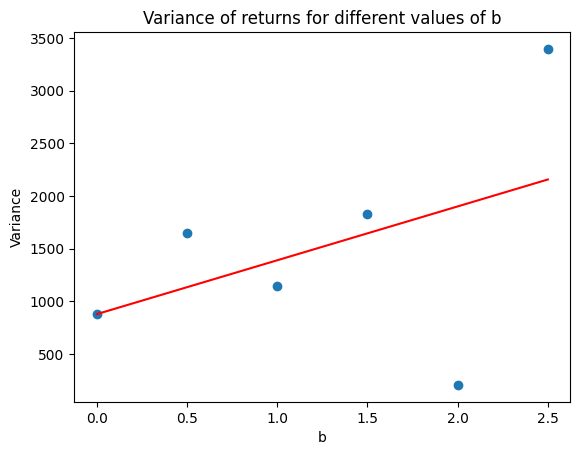

R^2: 0.19339943855484243)
intercept: 878.3786904761904
coefficient: [511.45189429]
Null hypothesis: the coefficient is zero
Alternative hypothesis: the coefficient is not zero
If p value is less than 0.05, we reject the null hypothesis
p value: 0.38286778655265974
Thus, we fail to reject the null hypothesis


In [ ]:
# Return variance for different values of b
plot_regression(b_range, b_return_means, "Variance of returns for different values of b", 'b', 'Variance', variance=True)

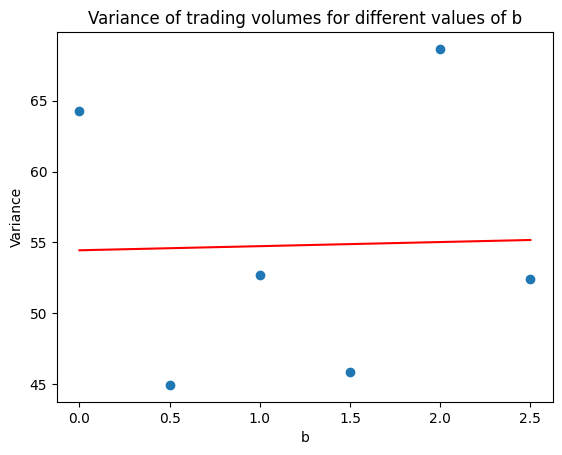

R^2: 0.0007855058299570672)
intercept: 54.4464369047619
coefficient: [0.29009714]
Null hypothesis: the coefficient is zero
Alternative hypothesis: the coefficient is not zero
If p value is less than 0.05, we reject the null hypothesis
p value: 0.9579706922557809
Thus, we fail to reject the null hypothesis


In [ ]:
# Volume variance for different values of b
plot_regression(b_range, b_volume_means, "Variance of trading volumes for different values of b", 'b', 'Variance', variance=True)

In [ ]:
# m_test - return and volume variances
m_range = [i for i in range(1, 500)]
m_dict = {'Range': m_range}

for run in range(iterations):
    returns = []
    volumes = []

    for i in m_range:
        m = i
        m_test = Stochastic_Model(n, p, init=10, time_horizon=True, M=i, d=d)
        
        for step in range(t):
            m_test.step()

        return_variance = np.var(m_test.returns)
        returns.append(return_variance)

    m_dict[f"Iteration {run}"] = returns


In [ ]:
df_return_variances_m = dict_to_df(m_dict, m_range)
df_return_variances_m.to_csv('data/return_variances_m.csv')


In [ ]:
m_return_means = np.array(df_return_variances_m.mean())
m_return_sd = np.array(df_return_variances_m.std())

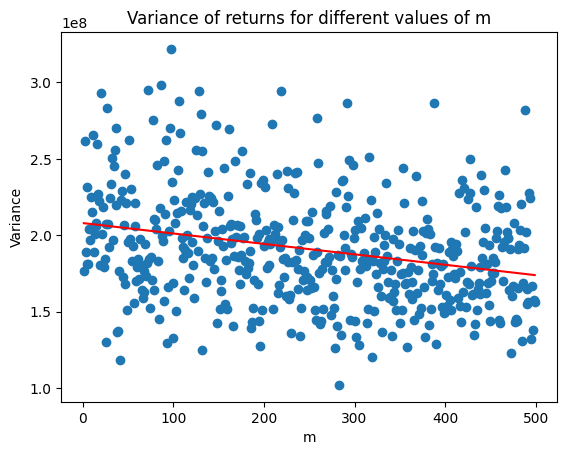

R^2: 0.07486555810842654)
intercept: 207959544.69514716
coefficient: [-68196.38031221]
Null hypothesis: the coefficient is zero
Alternative hypothesis: the coefficient is not zero
If p value is less than 0.05, we reject the null hypothesis
p value: 5.106772782426106e-10
Thus, we reject the null hypothesis in favor of the alternative hypothesis
However, the sample size is 499 so the results are not very reliable


In [ ]:
# Return variance for different values of m
plot_regression(m_range, m_return_means, "Variance of returns for different values of m", 'm', 'Variance', variance=True)

In [ ]:
# d_test - return and volume variances
d_range = [i*0.1 for i in range(1, 21)]
d_dict = {'Range': d_range}

for run in range(iterations):
    return_variances = []

    for i in d_range:
        d = i
        d_test = Stochastic_Model(n, p, init=10, time_horizon=True, M=M, d=d)
        
        for step in range(t):
            d_test.step()

        return_variance = np.var(d_test.returns)
        return_variances.append(return_variance)

    d_dict[f"Iteration {run}"] = return_variances
    
    print(run)

0
1
2


In [ ]:
df_return_variances_d = dict_to_df(d_dict, d_range)
df_return_variances_d.to_csv('data/return_variances_d.csv')

In [ ]:
# Mean and sd for return variances
d_return_means = np.array(df_return_variances_d.mean())
d_return_sd = np.array(df_return_variances_d.std())

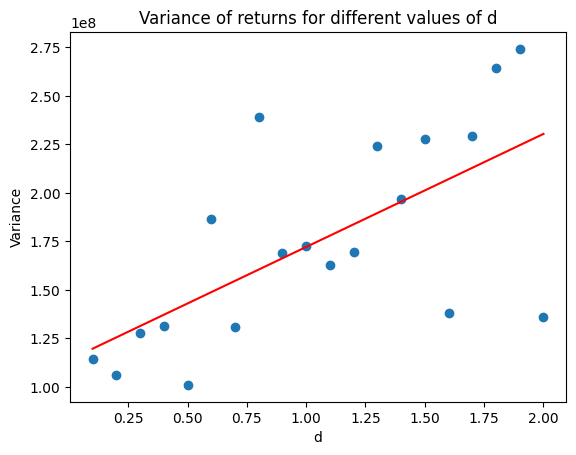

R^2: 0.41973720676450743)
intercept: 113822051.74684323
coefficient: [58271953.96650034]
Null hypothesis: the coefficient is zero
Alternative hypothesis: the coefficient is not zero
If p value is less than 0.05, we reject the null hypothesis
p value: 0.0020093746031644155
Thus, we reject the null hypothesis in favor of the alternative hypothesis
However, the sample size is 20 so the results are not very reliable


In [ ]:
# Return variance for different values of d
plot_regression(d_range, d_return_means, "Variance of returns for different values of d", 'd', 'Variance', variance=True)